# UMAP Experiments

* https://github.com/lmcinnes/umap
* https://www.youtube.com/watch?v=nq6iPZVUxZU
* https://umap-learn.readthedocs.io/en/latest/
* https://github.com/scikit-learn-contrib/hdbscan

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
import numpy as np

In [27]:
# noisy line
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2], [4, 3], [4, -1]])

# clear line
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2], [4, 3], [0, 0]])

# V shape
# X = np.array([[-1, 1], [-2, 2], [-3, 3], [1, 1], [2, 2], [3, 3], [4, 4]])

In [28]:
X

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2],
       [ 4,  3],
       [ 0,  0]])

In [29]:
import matplotlib.pyplot as plt

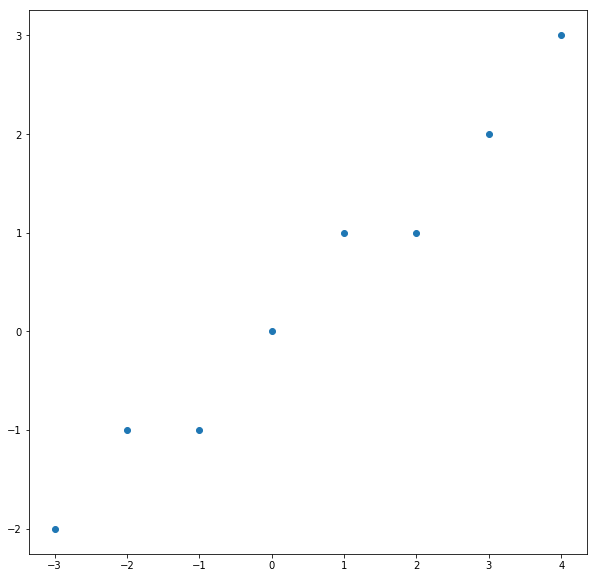

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1])
# plt.savefig('original.png')

In [31]:
umap_clf = umap.UMAP()

In [32]:
umap_clf.fit(X)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=15, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=False)

In [33]:
X_transformed = umap_clf.transform(X)
X_transformed

array([[ 3.6886566, 17.00542  ],
       [ 4.5674624, 17.548746 ],
       [ 4.6304417, 16.833479 ],
       [ 4.400698 , 18.657553 ],
       [ 4.2689643, 19.575293 ],
       [ 3.3750377, 19.867044 ],
       [ 3.410143 , 19.179314 ],
       [ 3.7172391, 17.998352 ]], dtype=float32)

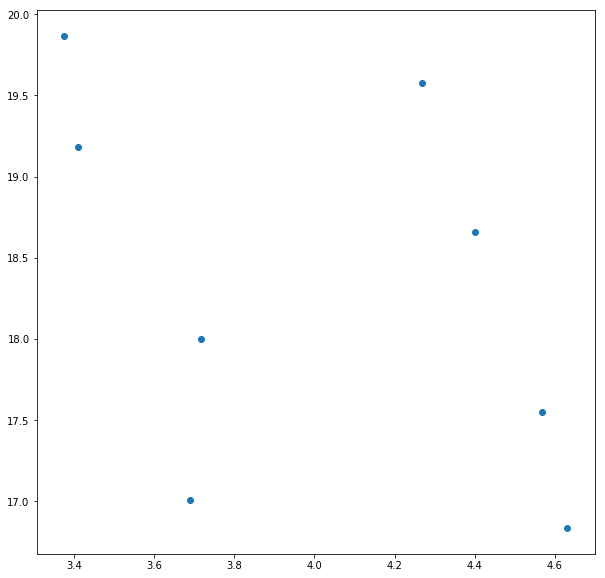

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
# plt.savefig('reduced.png')

In [40]:
umap_clf = umap.UMAP(n_components=1)

In [43]:
X_transformed = umap_clf.fit_transform(X)

In [44]:
X_transformed

array([[-16.016811],
       [-16.54715 ],
       [-17.116419],
       [-18.691952],
       [-18.05029 ],
       [-19.895098],
       [-19.309942],
       [-15.376902]], dtype=float32)

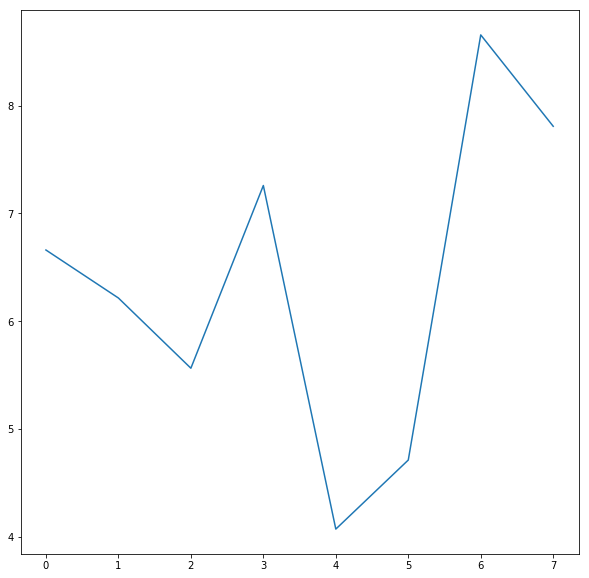

In [42]:
plt.figure(figsize=(10,10))
plt.plot(X_transformed)

### Maybe we get better results on actual clusters

In [45]:
from sklearn.datasets.samples_generator import make_blobs
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=42)

In [46]:
X

array([[ 0.71263709, -0.64203025],
       [ 0.86291419,  0.67908909],
       [-0.37379039, -1.0263001 ],
       ...,
       [ 1.45712913,  1.30077321],
       [ 1.86127298,  0.69306097],
       [ 1.27278119,  0.8758933 ]])

In [47]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

def plot_dataset(X, y_pred=[0], fname=None):
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # last color is black to properly display label -1 as noise (black)
    colors = np.append(np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1)))), ['#000000'])
    plt.figure(figsize=(10, 10))

    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    if fname:
        plt.savefig(fname)


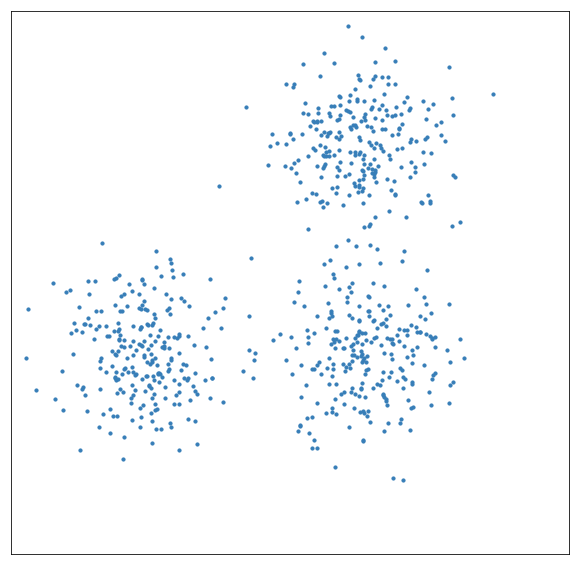

In [69]:
plot_dataset(X)

In [67]:
# UMAP?

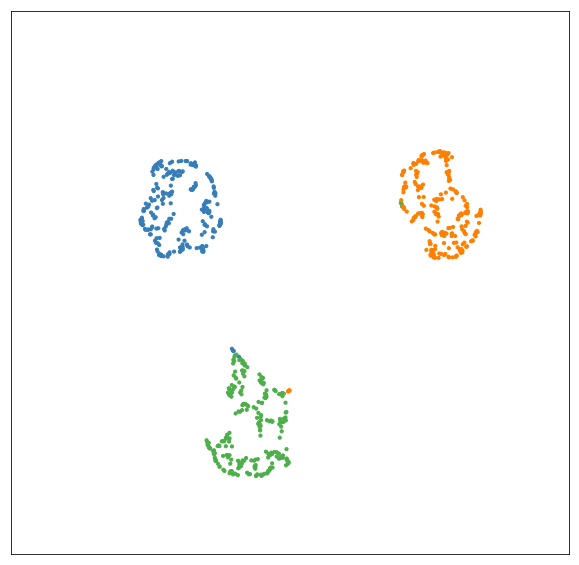

In [63]:
umap_clf = umap.UMAP(n_components=2)
X_transformed = umap_clf.fit_transform(X)
plot_dataset(X_transformed, labels_true)

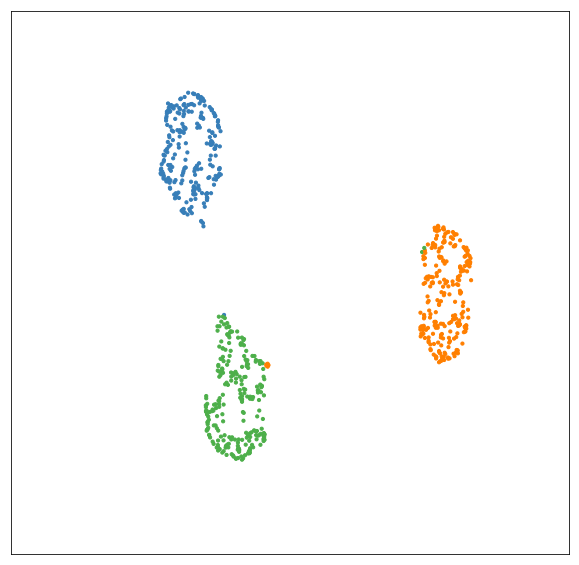

In [70]:
umap_clf = umap.UMAP(n_components=2, n_neighbors=50)
X_transformed = umap_clf.fit_transform(X)
plot_dataset(X_transformed, labels_true)

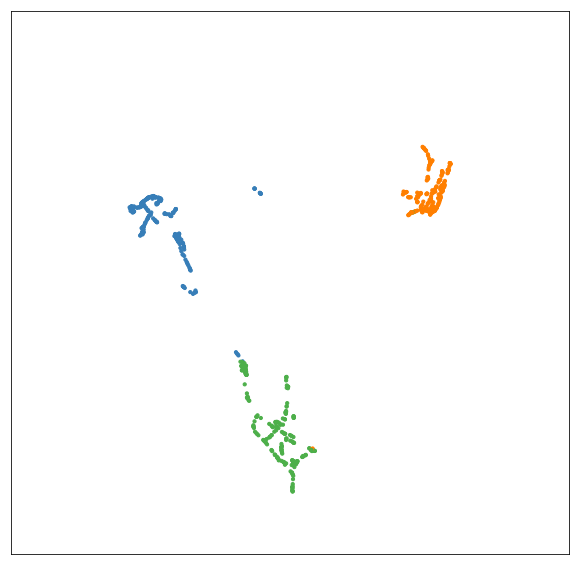

In [68]:
umap_clf = umap.UMAP(n_components=10, n_neighbors=5)
X_transformed = umap_clf.fit_transform(X)
plot_dataset(X_transformed, labels_true)

In [57]:
import umap
from sklearn.datasets import load_digits

digits = load_digits()

embedding = umap.UMAP().fit_transform(digits.data)

In [58]:
embedding

array([[17.183512 , -1.0178467],
       [-5.648297 ,  4.8143783],
       [-2.262863 ,  2.4185073],
       ...,
       [-3.9919388,  2.6743715],
       [-4.5486097, -2.592968 ],
       [-3.7394724,  2.1295016]], dtype=float32)

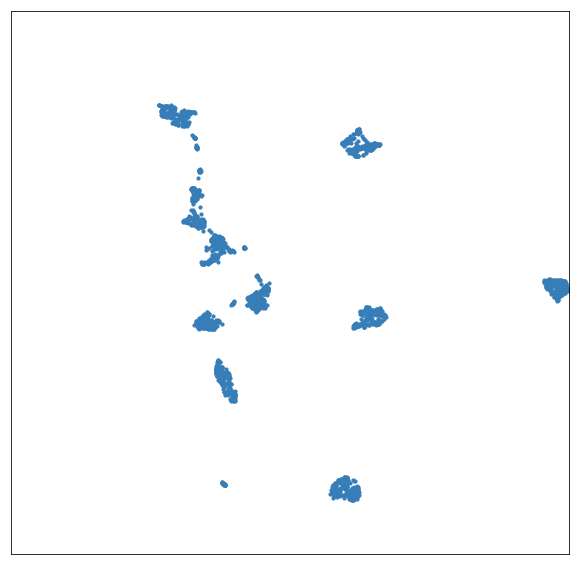

In [59]:
plot_dataset(embedding)